# Make toy dataset for regression problem

In [32]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
N_train = 20
N_test = 100
scale = 3
eps_train = np.random.normal(0, scale, N_train)
eps_test = np.random.normal(0, scale, N_test)
x_train = np.random.uniform(-4, 4, N_train)
x_test = np.linspace(-4, 4, N_test)
y_train = x_train**3 + eps_train
y_test = x_test**3 + eps_test

data_train = pd.DataFrame({'x': x_train, 'y': y_train})
data_test = pd.DataFrame({'x': x_test, 'y': y_test})

data_train.to_csv('data/toy_data_train.csv', index=False)
data_test.to_csv('data/toy_data_test.csv', index=False)

epoch 0, loss 458.34893798828125
epoch 50, loss 87.15675354003906
epoch 100, loss 59.758087158203125
epoch 150, loss 38.447208404541016
epoch 200, loss 23.291954040527344
epoch 250, loss 15.240938186645508
epoch 300, loss 11.680476188659668
epoch 350, loss 9.954902648925781
epoch 400, loss 8.859347343444824
epoch 450, loss 8.043910026550293
test loss 23.02181625366211


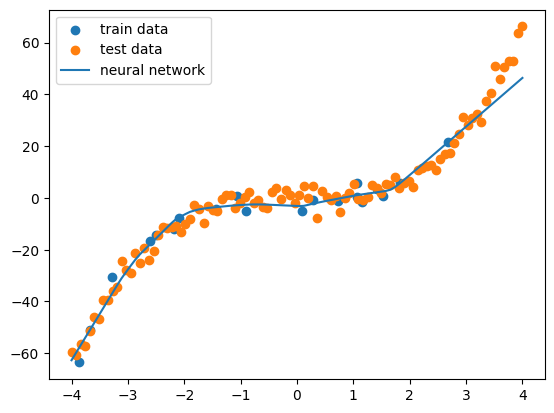

In [33]:
#make neural network with hidden layers and 50 nodes in each layer, relu activation function

hidden_layers = 1
hidden_nodes = 100
input_nodes = 1
output_nodes = 1

class SimpleNet(torch.nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = torch.nn.Linear(input_nodes, hidden_nodes)
        self.fc2 = torch.nn.Linear(hidden_nodes, output_nodes)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
net = SimpleNet()

#train the neural network
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

x_train = torch.tensor(pd.read_csv('data/toy_data_train.csv')['x'].values).float().view(-1, 1)
y_train = torch.tensor(pd.read_csv('data/toy_data_train.csv')['y'].values).float().view(-1, 1)
x_test = torch.tensor(pd.read_csv('data/toy_data_test.csv')['x'].values).float().view(-1, 1)
y_test = torch.tensor(pd.read_csv('data/toy_data_test.csv')['y'].values).float().view(-1, 1)

for epoch in range(500):
    optimizer.zero_grad()
    output = net(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

#test error
output = net(x_test)
test_loss = criterion(output, y_test)
print('test loss', test_loss.item())

#plot the results
plt.figure()
plt.scatter(x_train, y_train, label='train data')
plt.scatter(x_test, y_test, label='test data')
plt.plot(x_test, net(x_test).detach().numpy(), label='neural network')
plt.legend()

#save the model
torch.save(net.state_dict(), 'checkpoints/SimpleNet.pth')
